## Assignment 01: Financial Modelling using Python (FMP25)  

### Question 1: Schedule of repayment of the loan in 5 years (or ‘n’ number of years)

In [5]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta  # Important change

# Function to calculate EMI
def calculate_emi(principal, annual_rate, years):
    monthly_rate = annual_rate / (12 * 100)  # Convert annual rate to monthly rate
    months = years * 12  # Total number of payments
    emi = (principal * monthly_rate * (1 + monthly_rate) ** months) / ((1 + monthly_rate) ** months - 1)
    return emi

# Function to generate loan repayment schedule
def loan_schedule(principal, annual_rate, years, start_date):
    emi = calculate_emi(principal, annual_rate, years)
    remaining_balance = principal
    schedule = []
    payment_date = datetime.strptime(start_date, "%d %B %Y")
    
    for _ in range(years * 12):  # Iterate for each month
        interest_payment = (annual_rate / (12 * 100)) * remaining_balance
        principal_payment = emi - interest_payment
        remaining_balance -= principal_payment
        schedule.append([
            payment_date.strftime("%d-%b-%Y"),
            round(emi, 2),
            round(principal_payment, 2),
            round(interest_payment, 2),
            round(max(remaining_balance, 0),2)  # Avoid negative balances
        ])
        # Move to the 1st of next month
        payment_date += relativedelta(months=1)
        payment_date = payment_date.replace(day=1)
        
        if remaining_balance <= 0:
            break
    
    return pd.DataFrame(schedule, columns=["Payment Date", "EMI", "Principal", "Interest", "Balance Remaining"])

# Input details
principal = 800000  # Rs 0.8 million
annual_rate = 12  # 12% annual interest
years = 5  # Loan period
start_date = "01 January 2026"  # First payment date

# Generate schedule
schedule_df = loan_schedule(principal, annual_rate, years, start_date)

schedule_df

,Payment Date,EMI,Principal,Interest,Balance Remaining
0,01-Jan-2026,17795.56,9795.56,8000.00,790204.44
1,01-Feb-2026,17795.56,9893.51,7902.04,780310.93
2,01-Mar-2026,17795.56,9992.45,7803.11,770318.48
3,01-Apr-2026,17795.56,10092.37,7703.18,760226.11
4,01-May-2026,17795.56,10193.30,7602.26,750032.81
5,01-Jun-2026,17795.56,10295.23,7500.33,739737.58
6,01-Jul-2026,17795.56,10398.18,7397.38,729339.40
7,01-Aug-2026,17795.56,10502.16,7293.39,718837.23
8,01-Sep-2026,17795.56,10607.19,7188.37,708230.05
9,01-Oct-2026,17795.56,10713.26,7082.30,697516.79


### Question 2: Bond Valuation, Duration, and Convexity Calculation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_interpolated_rates(rate_data, total_terms):
    # Interpolate spot rates for all semi-annual periods
    all_terms = np.arange(1, total_terms + 1)
    rate_frame = pd.DataFrame({'Term': list(rate_data.keys()), 'Rate': list(rate_data.values())})
    rate_frame.set_index('Term', inplace=True)
    rate_frame = rate_frame.reindex(all_terms).interpolate(method='linear').bfill().ffill()
    return rate_frame['Rate'].values

def generate_cashflows(principal, coupon, terms):
    # Generate bond cash flows based on principal, coupon, and periods
    semi_annual_coupon = principal * coupon / 2
    flows = np.full(terms, semi_annual_coupon)
    flows[-1] += principal  # Add principal at maturity
    return flows

def calculate_discount_factors(rates):
    # Calculate discount factors from spot rates
    term_numbers = np.arange(1, len(rates) + 1)  # len(rates) gives the number of periods i.e. 40 here
    return 1 / (1 + rates / 2) ** term_numbers   # Payments are semi-annual and rates were annualized

def compute_bond_value(cashflows, discount_factors):
    # Calculate the present value of the bond
    return np.sum(cashflows * discount_factors)

def calculate_macaulay_duration(cashflows, discount_factors, bond_value):
    # Calculate Macaulay Duration (in years)
    terms = np.arange(1, len(cashflows) + 1)
    duration = np.sum(terms * cashflows * discount_factors) / bond_value
    return duration / 2  # Convert from periods to years

def calculate_bond_convexity(cashflows, rates, discount_factors, bond_value):
    # Calculate bond convexity (in years^2)
    terms = np.arange(1, len(cashflows) + 1)
    rate_half = rates / 2
    convexity = np.sum(cashflows * terms * (terms + 1) * discount_factors / (1 + rate_half) ** 2)
    return convexity / (bond_value * 4)

In [45]:
# Input Data: Spot rates for different periods (semi-annual)
spot_rate_info = {
    1: 0.029, 2: 0.044, 4: 0.048, 6: 0.050, 10: 0.053, 20: 0.054, 40: 0.055
}

bond_face_value = 100
annual_coupon_rate = 0.08  # 8% annual coupon
total_periods = 40         # 20 years * 2 periods per year

# Perform Calculations
interpolated_spot_rates = calculate_interpolated_rates(spot_rate_info, total_periods)
bond_cashflows = generate_cashflows(bond_face_value, annual_coupon_rate, total_periods)
discount_factors = calculate_discount_factors(interpolated_spot_rates)
bond_price = compute_bond_value(bond_cashflows, discount_factors)
macaulay_duration = calculate_macaulay_duration(bond_cashflows, discount_factors, bond_price)
bond_convexity = calculate_bond_convexity(bond_cashflows, interpolated_spot_rates, discount_factors, bond_price)

# Output results
print(f"Bond Price (Present Value): ${bond_price:.2f}")
print(f"Macaulay Duration: {macaulay_duration:.2f} years")
print(f"Convexity: {bond_convexity:.2f}")

Bond Price (Present Value): $131.07
Macaulay Duration: 11.43 years
Convexity: 175.51


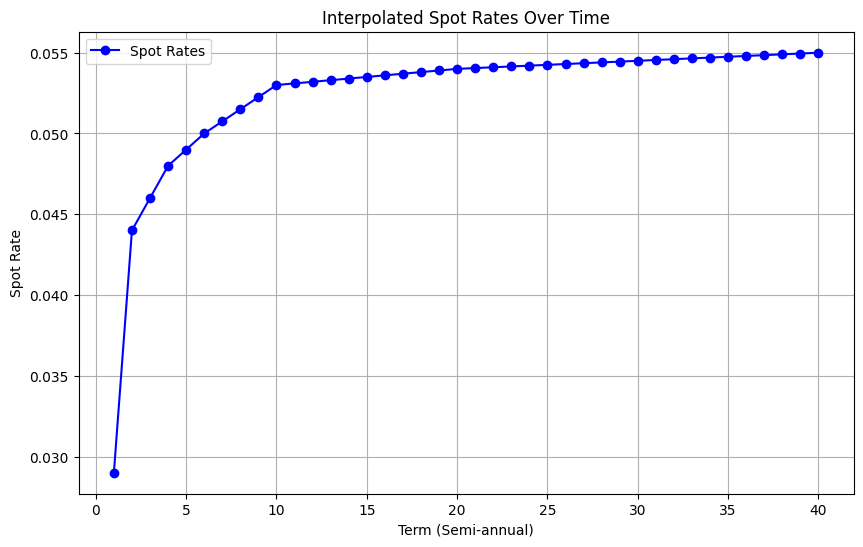

In [57]:
# Plot Spot Rates over time
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, total_periods + 1), interpolated_spot_rates, label='Spot Rates', color='b', marker='o')
plt.title('Interpolated Spot Rates Over Time')
plt.xlabel('Term (Semi-annual)')
plt.ylabel('Spot Rate')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Question 3: Stock Return Modeling using T-Copula

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm, gennorm
from copulae import StudentCopula
import matplotlib.pyplot as plt
import seaborn as sns

(a) Download 1-year historical stock prices for INFY and RIL

In [7]:
symbols = ['INFY.NS', 'RELIANCE.NS']
data = yf.download(symbols, start="2024-04-01", end="2025-04-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


(b) Compute daily returns

In [10]:
prices = data['Close'][symbols].dropna()
prices.columns = ['INFY', 'RIL']
returns = prices.pct_change().dropna()
returns.head()

,INFY,RIL
Date,,
2024-04-02,-0.008426,0.001465
2024-04-03,-0.001484,-0.010323
2024-04-04,0.004086,-0.005895
2024-04-05,-0.005112,-0.001931
2024-04-08,-0.001623,0.017721


(c) Fit Generalized Gaussian (or Normal if needed)

In [11]:
infy_norm_params = norm.fit(returns['INFY'])
ril_norm_params = norm.fit(returns['RIL'])

infy_gen_params = gennorm.fit(returns['INFY'])
ril_gen_params = gennorm.fit(returns['RIL'])

print("Fitted Normal Distribution Parameters:")
print(f"INFY -> Mean: {infy_norm_params[0]:.5f}, Std: {infy_norm_params[1]:.5f}")
print(f"RIL  -> Mean: {ril_norm_params[0]:.5f}, Std: {ril_norm_params[1]:.5f}")

print("\nFitted Generalized Gaussian Parameters:")
print(f"INFY -> Beta: {infy_gen_params[0]:.5f}, Loc: {infy_gen_params[1]:.5f}, Scale: {infy_gen_params[2]:.5f}")
print(f"RIL  -> Beta: {ril_gen_params[0]:.5f}, Loc: {ril_gen_params[1]:.5f}, Scale: {ril_gen_params[2]:.5f}")

Fitted Normal Distribution Parameters:
INFY -> Mean: 0.00041, Std: 0.01471
RIL  -> Mean: -0.00051, Std: 0.01376

Fitted Generalized Gaussian Parameters:
INFY -> Beta: 1.09888, Loc: 0.00027, Scale: 0.01207
RIL  -> Beta: 1.24147, Loc: -0.00012, Scale: 0.01303


(d) Fit t-Copula

In [12]:
def empirical_cdf(x):
    return np.argsort(np.argsort(x, axis=0), axis=0) / len(x)

pseudo_obs = empirical_cdf(
    returns.values)
copula = StudentCopula(dim=2)
copula.fit(pseudo_obs)

print("\nT-Copula Parameters:")
print("Correlation matrix:")
print(copula.params[1])
print(f"Degrees of freedom: {copula.params[0]:.2f}")


T-Copula Parameters:
Correlation matrix:
[0.18341643]
Degrees of freedom: 11.58


(e) Construct equal-weight portfolio

In [13]:
portfolio_weights = [0.5, 0.5]
returns['Portfolio'] = returns.dot(portfolio_weights)
returns.head()

,INFY,RIL,Portfolio
Date,,,
2024-04-02,-0.008426,0.001465,-0.003480
2024-04-03,-0.001484,-0.010323,-0.005903
2024-04-04,0.004086,-0.005895,-0.000904
2024-04-05,-0.005112,-0.001931,-0.003522
2024-04-08,-0.001623,0.017721,0.008049


(f) Simulate portfolio returns using copula (10,000 samples)

In [15]:
sim_u = copula.random(10000)
infy_sim = norm.ppf(sim_u[:, 0], *infy_norm_params)
ril_sim = norm.ppf(sim_u[:, 1], *ril_norm_params)
sim_portfolio_returns = 0.5 * infy_sim + 0.5 * ril_sim
sim_portfolio_returns

array([0.00828829, 0.00548893, 0.01627061, ..., 0.00760303, 0.0057611 ,
       0.01037202], shape=(10000,))

(g) Calculate 95% Value at Risk (VaR)

In [17]:
var_95 = np.percentile(sim_portfolio_returns, 5)
print(f"\n95% 1-day Value at Risk (VaR): {var_95:.4f} or {var_95*100:.2f}%")


95% 1-day Value at Risk (VaR): -0.0181 or -1.81%


c:\Users\Aniket\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


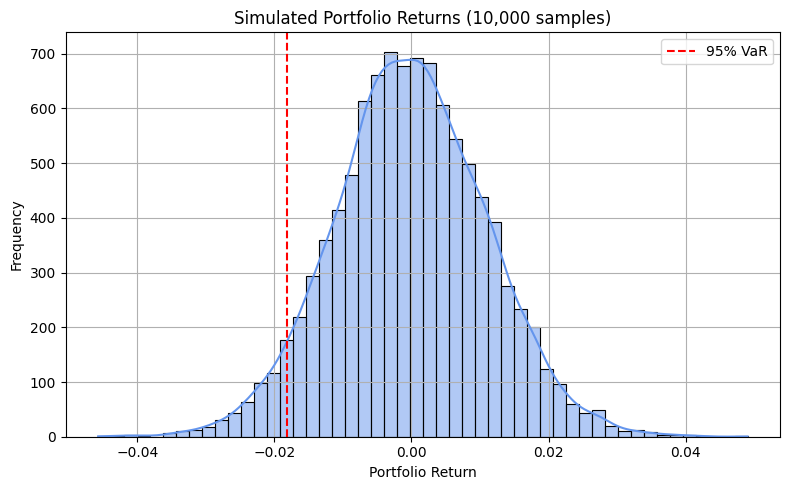

In [18]:
# Simulated portfolio returns distribution
plt.figure(figsize=(8, 5))
sns.histplot(sim_portfolio_returns, bins=50, kde=True, color='cornflowerblue')
plt.axvline(var_95, color='red', linestyle='--', label='95% VaR')
plt.title('Simulated Portfolio Returns (10,000 samples)')
plt.xlabel('Portfolio Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

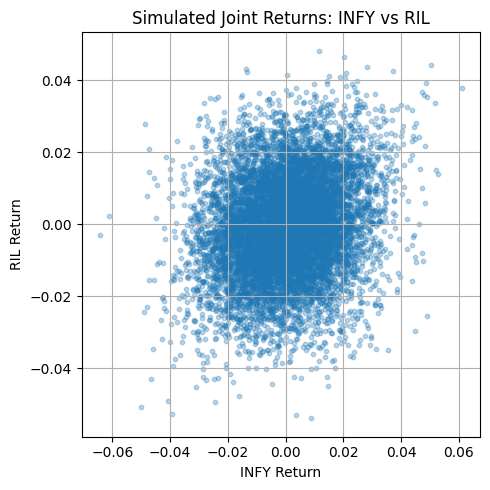

In [41]:
# Scatter plot of simulated joint returns
plt.figure(figsize=(5, 5))
plt.scatter(infy_sim, ril_sim, alpha=0.3, s=10)
plt.title('Simulated Joint Returns: INFY vs RIL')
plt.xlabel('INFY Return')
plt.ylabel('RIL Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 4: Options Pricing (NIFTY 50 Companies)

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Constants
risk_free_rate = 0.06  # 6% annual risk-free rate
expiry_months = 3  # Option expires in 3 months
expiry_time = expiry_months / 12  # Convert to years

# Fetch the first 3 NIFTY 50 companies
tickers = ['BHARTIARTL.NS', 'NTPC.NS', 'ADANIPORTS.NS']  
data = yf.download(tickers, start='2021-09-12', end='2024-09-12')['Close'] # Fetching closing prices for the last 3 years from my brithday

[*********************100%***********************]  3 of 3 completed


In [3]:
data.head(30)

Ticker,ADANIPORTS.NS,BHARTIARTL.NS,NTPC.NS
Date,,,
2021-09-13,731.892151,670.676331,98.554764
2021-09-14,742.009644,671.546997,99.326050
2021-09-15,752.372681,701.825623,106.439148
2021-09-16,756.007080,695.150818,106.267738
2021-09-17,753.502197,704.389038,106.053497
2021-09-20,735.624817,701.293518,107.900177
2021-09-21,736.312439,702.938049,109.131325
2021-09-22,732.088623,703.034851,109.395134
2021-09-23,741.125549,703.083191,110.978020


In [4]:
# Compute volatility (annualized standard deviation of log returns)
log_returns = np.log(data / data.shift(1)).dropna()
volatility = log_returns.std() * np.sqrt(252)

In [5]:
volatility

Ticker
ADANIPORTS.NS    0.410264
BHARTIARTL.NS    0.218368
NTPC.NS          0.275107
dtype: float64

In [6]:
# Get last stock prices and calculate strike price
last_prices = data.iloc[-1]
one_month_ago_prices = data.iloc[-22]  # Approx. 22 trading days in a month
strike_prices = 1.2 * one_month_ago_prices

In [7]:
strike_prices

Ticker
ADANIPORTS.NS    1801.680029
BHARTIARTL.NS    1750.319971
NTPC.NS           474.375879
Name: 2024-08-12 00:00:00, dtype: float64

In [8]:
# Black-Scholes formula for Call & Put option pricing
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # put option
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price, d1, d2

In [9]:
def greeks_call(S, K, T, r, sigma):
    _, d1, d2 = black_scholes(S, K, T, r, sigma, "call")
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return delta, gamma, vega, theta

def greeks_put(S, K, T, r, sigma):
    _, d1, d2 = black_scholes(S, K, T, r, sigma, "put")
    delta = norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    return delta, gamma, vega, theta

In [10]:
options_data = []

for ticker in tickers:
    S, K, sigma = last_prices[ticker], strike_prices[ticker], volatility[ticker]
    
    call_price, _, _ = black_scholes(S, K, expiry_time, risk_free_rate, sigma, "call")
    put_price, _, _ = black_scholes(S, K, expiry_time, risk_free_rate, sigma, "put")
    
    delta_c, gamma_c, vega_c, theta_c = greeks_call(S, K, expiry_time, risk_free_rate, sigma)
    delta_p, gamma_p, vega_p, theta_p = greeks_put(S, K, expiry_time, risk_free_rate, sigma)
    
    options_data.append([
        ticker, S, K,
        call_price, put_price,
        delta_c, gamma_c, vega_c, theta_c,
        delta_p, gamma_p, vega_p, theta_p
    ])

In [11]:
columns = [
    "Stock", "S", "K",
    "Call Price", "Put Price",
    "Call Delta", "Call Gamma", "Call Vega", "Call Theta",
    "Put Delta", "Put Gamma", "Put Vega", "Put Theta"
]

options_df = pd.DataFrame(options_data, columns=columns)
options_df

,Stock,S,K,Call Price,Put Price,Call Delta,Call Gamma,Call Vega,Call Theta,Put Delta,Put Gamma,Put Vega,Put Theta
0,BHARTIARTL.NS,1577.800049,1750.319971,21.137455,167.598507,0.224102,0.001737,236.064588,-123.044810,-0.775898,0.001737,236.064588,-19.589144
1,NTPC.NS,384.267944,474.375879,2.030544,85.075942,0.087923,0.003019,30.663262,-18.776663,-0.912077,0.003019,30.663262,9.262137
2,ADANIPORTS.NS,1430.599976,1801.680029,24.598480,368.855013,0.171415,0.000867,181.971920,-162.550706,-0.828585,0.000867,181.971920,-56.059315


In [12]:
import numpy as np
import pandas as pd
import itertools
from scipy.linalg import null_space

def extract_greek_rows(options_df):
    """Convert the wide DataFrame (call/put per stock) into a long-form list of options."""
    option_rows = []

    for i, row in options_df.iterrows():
        stock = row['Stock']

        # Call
        option_rows.append({
            'Option': f'{stock}_Call',
            'Type': 'Call',
            'Delta': row['Call Delta'],
            'Gamma': row['Call Gamma'],
            'Vega':  row['Call Vega']
        })

        # Put
        option_rows.append({
            'Option': f'{stock}_Put',
            'Type': 'Put',
            'Delta': row['Put Delta'],
            'Gamma': row['Put Gamma'],
            'Vega':  row['Put Vega']
        })

    return pd.DataFrame(option_rows).set_index('Option')

In [13]:
def find_neutral_portfolios_from_df(options_df):
    long_form_df = extract_greek_rows(options_df)
    neutral_results = []

    # Try all 3-option combinations
    combos = list(itertools.combinations(long_form_df.index, 3))

    for combo in combos:
        selected = long_form_df.loc[list(combo)]
        deltas = selected['Delta'].to_numpy()
        gammas = selected['Gamma'].to_numpy()
        vegas  = selected['Vega'].to_numpy()

        A = np.array([deltas, gammas, vegas])

        null_vec = null_space(A)

        if null_vec.size == 0:
            continue

        weights = null_vec[:, 0]
        weights = weights / np.min(np.abs(weights))  # Normalize

        result = selected.copy()
        result['Weight'] = weights
        neutral_results.append(result)

    if not neutral_results:
        print("❌ No Delta-Gamma-Vega neutral portfolio found.")
    else:
        print(f"✅ Found {len(neutral_results)} neutral combinations!\n")
        for i, df in enumerate(neutral_results, 1):
            print(f"\n--- Portfolio #{i} ---")
            print(df[['Type', 'Delta', 'Gamma', 'Vega', 'Weight']])

    return neutral_results

In [14]:
# Assuming options_df is your full DataFrame
neutral_portfolios = find_neutral_portfolios_from_df(options_df)

❌ No Delta-Gamma-Vega neutral portfolio found.


### Such a portfolio might not be possible because:

1. **Insufficient Independent Instruments**  
   - You have just **one call and one put** for each stock (2 options × 3 stocks = 6 options), plus 3 stocks — a total of **9 instruments**.  
   - However, the **three neutrality requirements** (Delta, Gamma, Vega) must be satisfied using this limited set.  
   - Since the options are all tied to the **same underlying stocks**, their Greeks are **not independent enough** to fully neutralize the risks.

2. **Stocks Cannot Adjust Gamma or Vega**  
   - Stocks contribute **only to Delta (+1)**.  
   - They have **no impact on Gamma or Vega**, meaning they cannot assist in neutralizing those risks.  
   - Therefore, the burden of neutralizing Gamma and Vega falls **entirely on the options**.

3. **Options Have Closely Related Greeks**  
   - Calls and puts at the same strike and expiry tend to have **very similar Delta, Gamma, and Vega profiles** (due to **Put-Call parity** and **Black-Scholes relationships**).  
   - As a result, their contributions to Gamma and Vega are **not sufficiently independent** to achieve neutrality across all three stocks.

4. **System is Under- or Over-Determined**  
   - To achieve Delta-Gamma-Vega neutrality, you generally need **more instruments than constraints**.  
   - Additionally, the instruments must have **diverse and independent Greek sensitivities** (for example, options with different strikes or maturities).  
   - In your case, the available instruments are **too few and too similar**, making it mathematically impossible to neutralize all three Greeks simultaneously

### Question 5: INFY Stock Valuation using CAPM  

In [ ]:
import numpy as np
from scipy.stats import norm

rf = 0.053  # Risk-free rate
beta = 0.55  # Beta of INFY
market_return = 0.10  # Expected market return
market_volatility = 0.15  # Annualized volatility of market return
current_price = 3500  # Current INFY price

# a. Expected return using CAPM
expected_return = rf + beta * (market_return - rf)
print(f"(a) Expected Return of INFY: {expected_return*100:.2f}%")

# b. Expected price after one year
expected_price = current_price * (1 + expected_return)
print(f"(b) Expected Price after 1 year: Rs. {expected_price:.2f}")

# c. Annualised volatility of INFY
infy_volatility = beta * market_volatility
print(f"(c) Annualised Volatility of INFY: {infy_volatility*100:.2f}%")

# d. Probability that price after 1 year < Rs. 3500 (i.e., return <= 0)

# Convert to Z-score assuming normal distribution of return
target_return = 0  # zero return implies same price
z_score = (target_return - expected_return) / infy_volatility
probability = norm.cdf(z_score)
print(f"(d) Probability that INFY < Rs. 3500 after 1 year: {probability*100:.2f}%")

(a) Expected Return of INFY: 7.89%
(b) Expected Price after 1 year: Rs. 3775.98
(c) Annualised Volatility of INFY: 8.25%
(d) Probability that INFY < Rs. 3500 after 1 year: 16.96%
